In [1]:
## Libraries
import pandas as pd
import numpy as np

In [2]:
T = pd.read_csv('Telco_Churn_Data.csv')

In [3]:
T.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
T.shape

(7043, 21)

In [5]:
T.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
T.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
T['SeniorCitizen'] = T['SeniorCitizen'].astype('category')

In [8]:
T['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
T ['TotalCharges'] = pd.to_numeric(T['TotalCharges'], errors='coerce')

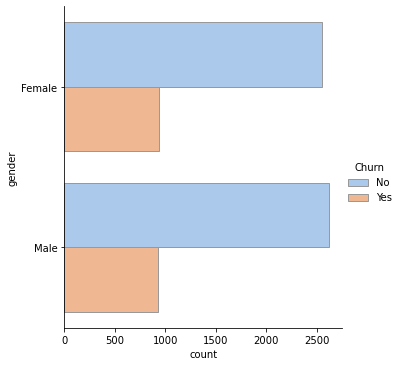

In [10]:
import seaborn as sns
sns.catplot(y="gender", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

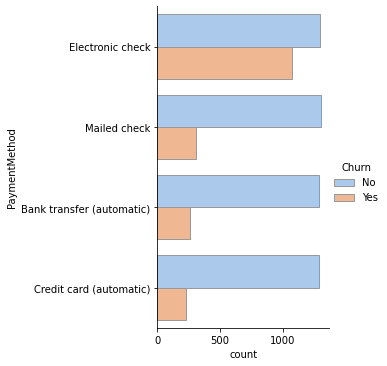

In [11]:
sns.catplot(y="PaymentMethod", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

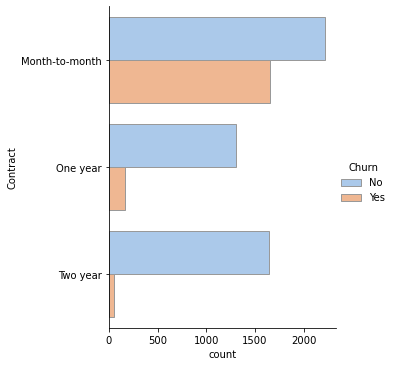

In [12]:
sns.catplot(y="Contract", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

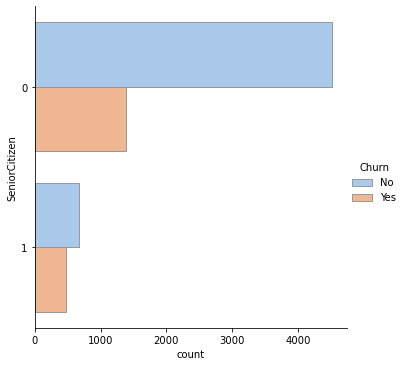

In [13]:
sns.catplot(y="SeniorCitizen", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

<Figure size 2880x720 with 0 Axes>

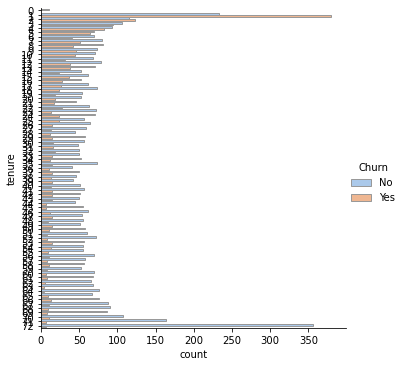

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
sns.catplot(y="tenure", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

In [15]:
def tenure(row):
    if row['tenure']>=72:
        return '>=6 Years'
    elif row['tenure']>=60:
        return '5-6 Years'
    elif row['tenure']>=48:
        return '4-5 Years'
    elif row['tenure']>=36:
        return '3-4 Years'
    elif row['tenure']>=24:
        return '2-3 Years'
    elif row['tenure']>=12:
        return '1-2 Years'
    elif row['tenure']>=6:
        return '6 Months - 1 Year'
    else:
        return '<6 months'
T['tenure_buc'] = T.apply(tenure, axis=1)

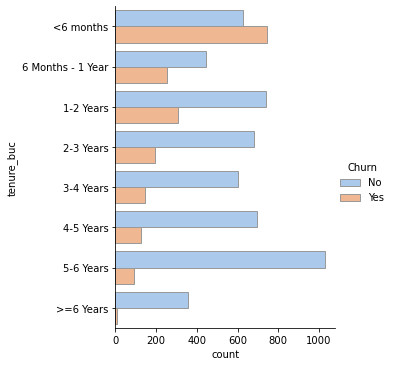

In [16]:
import matplotlib.pyplot as plt
sns.catplot(y="tenure_buc", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T, order=['<6 months','6 Months - 1 Year','1-2 Years','2-3 Years','3-4 Years','4-5 Years','5-6 Years','>=6 Years'])

<Figure size 2880x720 with 0 Axes>

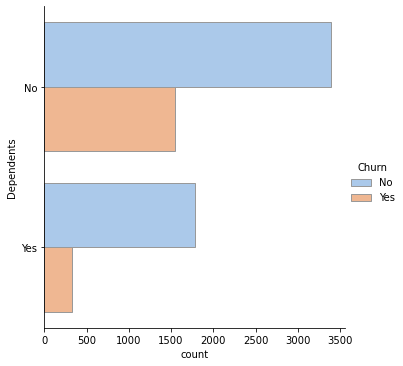

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
sns.catplot(y="Dependents", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

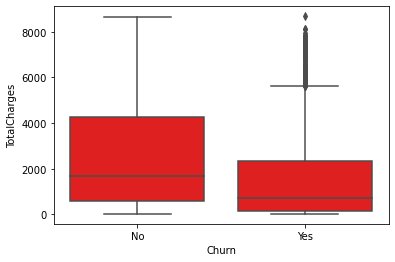

In [18]:
sns.boxplot(
    data=T,
    x='Churn',
    y='TotalCharges',
    color='red')

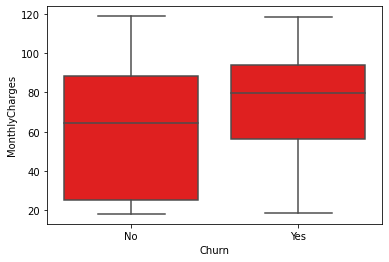

In [19]:
sns.boxplot(
    data=T,
    x='Churn',
    y='MonthlyCharges',
    color='red')

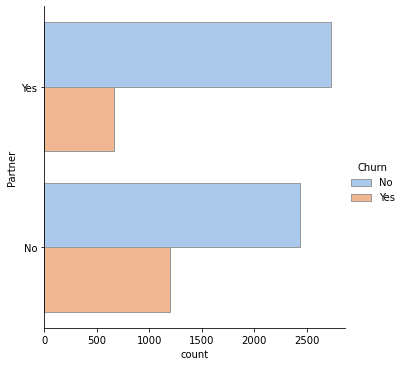

In [20]:
import matplotlib.pyplot as plt
sns.catplot(y="Partner", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

In [21]:
T.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_buc           0
dtype: int64

## Splitting into Test and Train

In [22]:
def target(row):
    if row['Churn']=='Yes':
        return 1
    else:
        return 0
T['Churn_target'] = T.apply(target, axis=1)

In [23]:
T.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_buc,Churn_target
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,<6 months,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 Years,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,<6 months,1
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 Years,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,<6 months,1


In [24]:
from sklearn.model_selection import train_test_split
X = T.drop(['Churn','Churn_target'], axis=1)
y = T['Churn_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify = y)

In [25]:
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_buc
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,<6 months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,2-3 Years
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,<6 months
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,3-4 Years
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,<6 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,2-3 Years
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,>=6 Years
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,6 Months - 1 Year
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,<6 months


In [26]:
T

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_buc,Churn_target
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,<6 months,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 Years,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,<6 months,1
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 Years,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,<6 months,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,2-3 Years,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,>=6 Years,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,6 Months - 1 Year,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,<6 months,1


In [27]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.73457
1    0.26543
Name: Churn_target, dtype: float64
0    0.73481
1    0.26519
Name: Churn_target, dtype: float64


## Treating Missing Values

In [28]:
cat_attr = list(X_train.select_dtypes(include=['category','object']).columns)
num_attr = list(X_train.select_dtypes(include=['number']).columns)

In [29]:
cat_attr, num_attr

(['customerID',
  'gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'tenure_buc'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'])

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(X_train[num_attr])

X_train[num_attr] = imputer.transform(X_train[num_attr])
X_test[num_attr] = imputer.transform(X_test[num_attr])

<ipython-input-30-42c17e6a4822>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_attr] = imputer.transform(X_train[num_attr])
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-30-42c17e6a4822>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [31]:
print(X_train.isna().sum(), X_test.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
tenure_buc          0
dtype: int64 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
tenure_buc          0
dtype: int64


### Removing Irrelavant Columns

In [32]:
X_train = X_train.drop(['customerID'], axis=1)
X_test = X_test.drop(['customerID'], axis=1)

## Standardizing the numeric Data

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[num_attr])

X_train_std = pd.DataFrame(scaler.transform(X_train[num_attr]), columns=num_attr)
X_test_std = pd.DataFrame(scaler.transform(X_test[num_attr]), columns=num_attr)

In [34]:
[X_train_std['MonthlyCharges'].mean(), X_train_std['MonthlyCharges'].std()]

[1.2153179720527557e-16, 1.0000946745564259]

## One - Hot Encoding of Categorical Data

In [35]:
cat_attr = list(X_train.select_dtypes(include=['category','object']).columns)
cat_attr

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_buc']

In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [37]:
ohe = OneHotEncoder(handle_unknown='error')

ohe.fit(X_train[cat_attr])

columns_ohe = list(ohe.get_feature_names(cat_attr))
print(columns_ohe)

X_train_cat = ohe.transform(X_train[cat_attr])
X_test_cat = ohe.transform(X_test[cat_attr])

X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

['gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_buc_1-2 Years', 'tenure_buc_2-3 Years', 'tenure_buc_3-4 Years', 'tenure_buc_4-5 Years', 'tenure_buc_5-6 Years', 'tenure_buc_6 Months - 1 Year', 'tenure_buc_<6 months', 'tenure_buc_>=6 Years

In [38]:
X_train_preprocessed = pd.concat([X_train_std, X_train_cat], axis=1)
X_test_preprocessed = pd.concat([X_test_std, X_test_cat], axis=1)

In [39]:
[X_train_preprocessed.shape, X_test_preprocessed.shape]

[(5282, 47), (1761, 47)]

In [40]:
X_train_preprocessed

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_buc_1-2 Years,tenure_buc_2-3 Years,tenure_buc_3-4 Years,tenure_buc_4-5 Years,tenure_buc_5-6 Years,tenure_buc_6 Months - 1 Year,tenure_buc_<6 months,tenure_buc_>=6 Years
0,0.964787,1.402679,1.611765,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.416288,1.066588,-0.080794,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.538148,-1.489029,-0.842931,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.269305,-1.474055,-0.991957,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.091329,-0.527345,-0.322081,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-0.294429,1.000036,0.042521,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5278,0.517969,-1.329303,-0.482172,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5279,0.071150,1.354428,0.628508,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5280,0.355489,1.262918,0.860319,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Modelling

In [41]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Packages
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
import scipy
from scipy.stats import spearmanr

### 1. Logistic Regression

In [42]:
LR = LogisticRegression()
LR.fit(X_train_preprocessed, y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
# Prediction and Classification Report on Train set
y_pred_train_LR = LR.predict(X_train_preprocessed)
print(classification_report(y_train, y_pred_train_LR))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3880
           1       0.68      0.54      0.60      1402

    accuracy                           0.81      5282
   macro avg       0.76      0.72      0.74      5282
weighted avg       0.80      0.81      0.80      5282



In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train_LR)

array([[3519,  361],
       [ 649,  753]], dtype=int64)

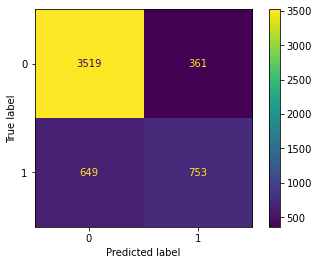

In [45]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_train_preprocessed, y_train)

Order of evaluating he model:
1.Check positive class precision and recall
2.weighted average of precison and recall
3.



In [46]:
log_odds = LR.coef_[0]
pd.DataFrame(log_odds, 
             X_train_preprocessed.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
tenure_buc_5-6 Years,0.918579
InternetService_Fiber optic,0.842222
Contract_Month-to-month,0.693475
tenure_buc_4-5 Years,0.544519
tenure_buc_3-4 Years,0.339494
PaymentMethod_Electronic check,0.214892
tenure_buc_<6 months,0.190465
PhoneService_No,0.182578
StreamingMovies_Yes,0.158426
TechSupport_No,0.131961


In [47]:
odds = np.exp(LR.coef_[0])
pd.DataFrame(odds, 
             X_train_preprocessed.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
tenure_buc_5-6 Years,2.505727
InternetService_Fiber optic,2.321520
Contract_Month-to-month,2.000655
tenure_buc_4-5 Years,1.723779
tenure_buc_3-4 Years,1.404237
PaymentMethod_Electronic check,1.239728
tenure_buc_<6 months,1.209812
PhoneService_No,1.200307
StreamingMovies_Yes,1.171665
TechSupport_No,1.141064


In [48]:
LR.intercept_

array([-1.53721497])

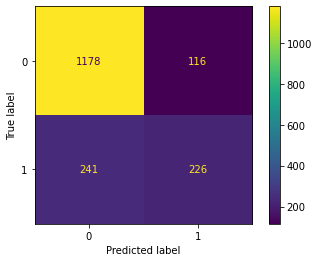

In [49]:
plot_confusion_matrix(LR, X_test_preprocessed, y_test)

In [50]:
# Prediction and Classification Report on Train set
y_pred_test_LR = LR.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_LR))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.66      0.48      0.56       467

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.71      1761
weighted avg       0.79      0.80      0.79      1761



## 2. Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
DT=DecisionTreeClassifier()

In [53]:
DT.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier()

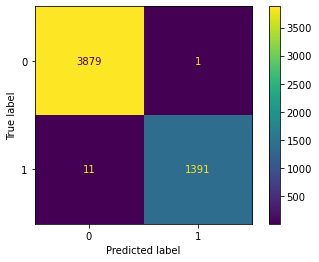

In [54]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DT, X_train_preprocessed, y_train)

In [55]:
# prediction and classification report on Train Set
y_pred_train_DT=DT.predict(X_train_preprocessed)
print(classification_report(y_train, y_pred_train_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3880
           1       1.00      0.99      1.00      1402

    accuracy                           1.00      5282
   macro avg       1.00      1.00      1.00      5282
weighted avg       1.00      1.00      1.00      5282



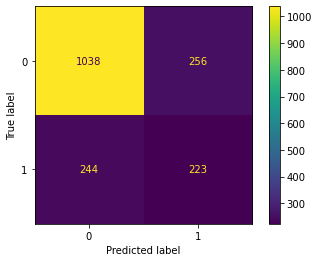

In [56]:
plot_confusion_matrix(DT, X_test_preprocessed, y_test)

In [57]:
# prediction and classification report on Test Set
y_pred_test_DT=DT.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_DT))

# the model very well workin on train but not on train

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1294
           1       0.47      0.48      0.47       467

    accuracy                           0.72      1761
   macro avg       0.64      0.64      0.64      1761
weighted avg       0.72      0.72      0.72      1761



In [58]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [59]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image 
import pydotplus
from sklearn import tree


[Text(106.51027887154044, 213.41333333333333, 'X[30] <= 0.5\ngini = 0.39\nsamples = 5282\nvalue = [3880, 1402]'),
 Text(38.03381646030591, 205.36, 'X[1] <= 0.966\ngini = 0.12\nsamples = 2358\nvalue = [2207, 151]'),
 Text(24.256540422432632, 197.30666666666667, 'X[32] <= 0.5\ngini = 0.069\nsamples = 1783\nvalue = [1719, 64]'),
 Text(13.83823743627094, 189.25333333333333, 'X[28] <= 0.5\ngini = 0.124\nsamples = 799\nvalue = [746, 53]'),
 Text(4.267297887836854, 181.2, 'X[2] <= -0.483\ngini = 0.232\nsamples = 217\nvalue = [188, 29]'),
 Text(1.950764748725419, 173.14666666666668, 'X[3] <= 0.5\ngini = 0.434\nsamples = 22\nvalue = [15, 7]'),
 Text(1.1704588492352515, 165.09333333333333, 'X[19] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.7803058994901676, 157.04, 'X[37] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.3901529497450838, 148.98666666666668, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(1.1704588492352515, 148.98666666666668, 'gini = 0.0\nsamples = 

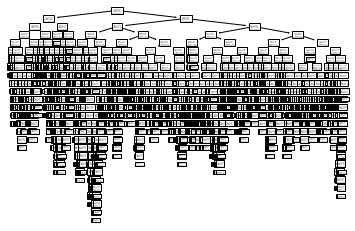

In [60]:
tree.plot_tree(DT)


### LIST of all parameters to use in a decision tree for hyperparameter tuning

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## TUNING HYPERPARAMETER

In [61]:
#to balance the overfitting we do hyperparameter tuning
#go to sklearn site and check for all hyperparameters we can tune
param={
    "criterion":['gini','entropy'],
    "max_depth": range(1,10),
    "min_samples_split":range(1,10), #
    "min_samples_leaf":range(1,5)
}

#1st optimization we did on gini and entropy
#2nd optimization we did on depth(how much depth a DT is allowed to go)
#3rd optimization we did on the split
#4th optimization we did on the leaf(the min no. of sample required to be a leaf node)

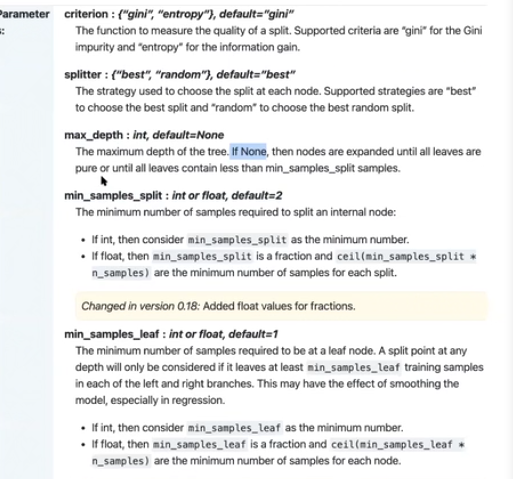

In [62]:
# Cross Validation(CV): Another method to do train test split



In [63]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DT, param_grid=param, cv=10, verbose=1, n_jobs=-1)  #=(inputmodel, grid of parameter)
grid.fit(X_train_preprocessed, y_train)
#n_jobs=-1 we r telling python to use all of memory which is required
#verbose=1 we are telling python to print the details

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.73457066 0.73457066 0.73457066 0.73457066 0.73457066
 0.73457066 0.73457066 0.73457066        nan 0.73457066 0.73457066
 0.73457066 0.73457066 0.73457066 0.73457066 0.73457066 0.73457066
        nan 0.73457066 0.73457066 0.73457066 0.73457066 0.73457066
 0.73457066 0.73457066 0.73457066        nan 0.73457066 0.73457066
 0.73457066 0.73457066 0.73457066 0.73457066 0.73457066 0.73457066
        nan 0.76600432 0.76600432 0.76600432 0.76600432 0.76600432
 0.76600432 0.76600432 0.76600432        nan 0.76600432 0.76600432
 0.76600432 0.76600432 0.76600432 0.76600432 0.76600432 0.76600432
        nan 0.76600432 0.76600432 0.76600432 0.76600432 0.76600432
 0.76600432 0.76600432 0.76600432        nan 0.76600432 0.76600432
 0.76600432 0.76600432 0.76600432 0.76600432 0.76600432 0.76600432
        nan 0.79004769 0.79004769 0.79004769 0.7900476

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

## cv=crossvalidation
this is other method to split in train and test but in multiple

Types:
1. k-fold cv: In entire train data if we have k=10
            so we 1st split train in 90, 10
            here 10 is validation and 90 is train
            steps:1.n1 to n90, validation n91-n100
                  2.n1 to n10 and n21 to n100 is train, validation=n11-n20
                  like this we do multiple times with many combination
                  and we see that which combination gives best results on test as we r always validating on the test data.
                  
                  3. After doing these iterations, we take avg of all the iteration 
                  4. FInally we apply it to whole test data andcheck final performance

In [64]:
# printing out best possible parameters
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [65]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [66]:
# introducing the best parameters found above
DT1=DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=7, criterion='gini')

In [67]:
DT1.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=7)

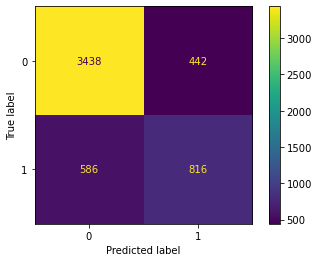

In [68]:
plot_confusion_matrix(DT1, X_train_preprocessed, y_train)

In [69]:
# prediction and classification report on Train Set
y_pred_train_DT1=DT1.predict(X_train_preprocessed)
print(classification_report(y_train, y_pred_train_DT1))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3880
           1       0.65      0.58      0.61      1402

    accuracy                           0.81      5282
   macro avg       0.75      0.73      0.74      5282
weighted avg       0.80      0.81      0.80      5282



In [70]:
# prediction and classification report on Test Set
y_pred_test_DT1=DT1.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_DT1))


              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1294
           1       0.61      0.54      0.58       467

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.78      0.79      0.78      1761



In [71]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [72]:
feature_names=list(X_train_preprocessed.columns)
target_names=list(y_train.unique())

In [73]:
feature_names

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'SeniorCitizen_0',
 'SeniorCitizen_1',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure_buc_1-2 Years',
 'tenure_buc_2-3 Years',
 'tenure_buc_3-4 Years',
 'tenure_buc_4-5 Years',
 'tenure_buc_5-

In [74]:
target_names


[0, 1]

TypeError: can only concatenate str (not "numpy.int64") to str

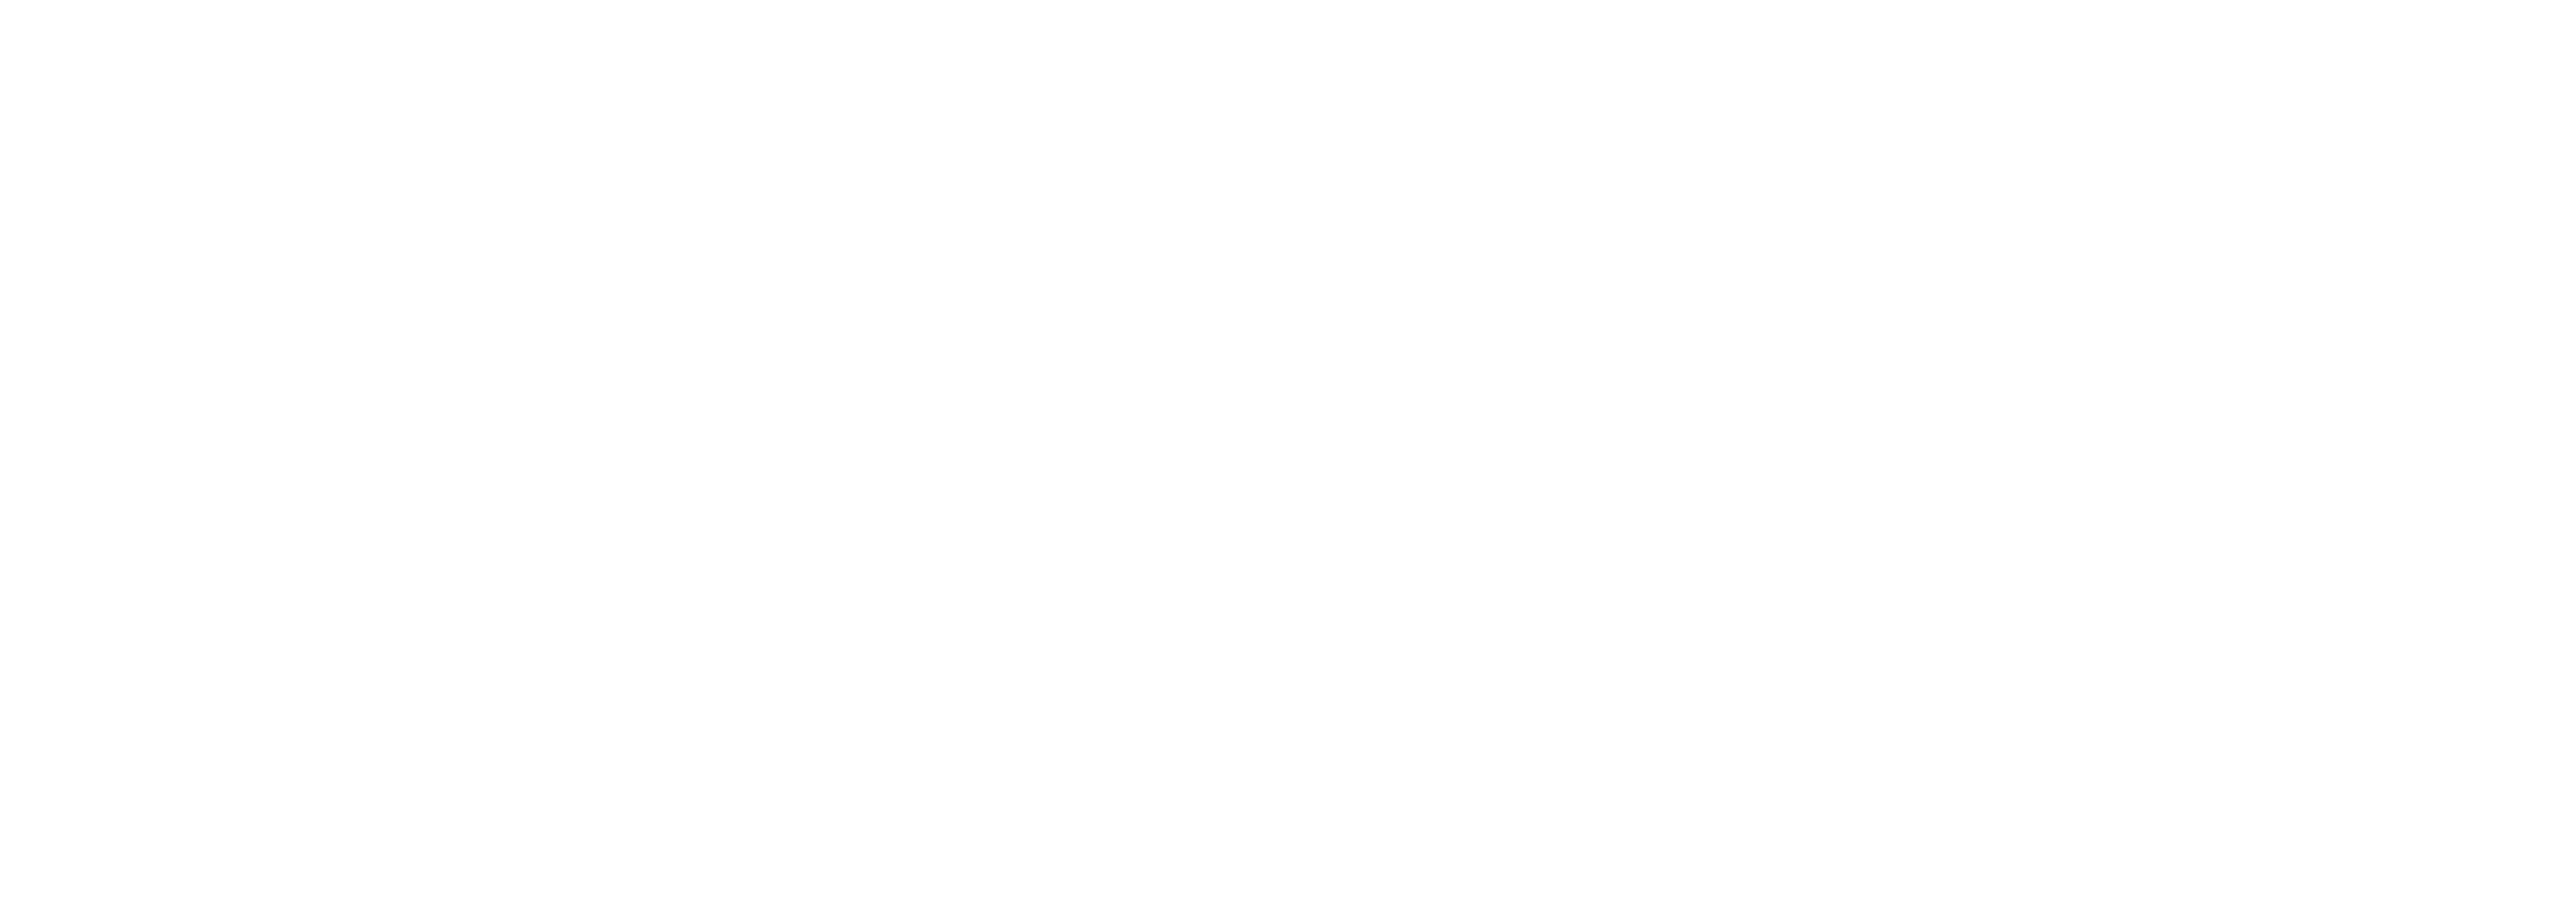

In [75]:
plt.figure(figsize=(55,20))
a=plot_tree(DT,
           feature_names=feature_names,
           class_names=target_names,
           filled=True,
           rounded=True,
           fontsize=14)

In [ ]:
BY HYPERPARAMETER TUNING ABOVE MODEL WAS NOT DRASTICALLY IMPROVED 
LETS TRY TO IMPROVE MORE

## Random Forest

In [76]:
#initial model without tuning
RF=RandomForestClassifier()
RF.fit(X_train_preprocessed,y_train)

RandomForestClassifier()

In [77]:
#Prediction and Clasification Report on Train set
y_pred_train_RF=RF.predict(X_train_preprocessed)
print(classification_report(y_train, y_pred_train_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3880
           1       1.00      1.00      1.00      1402

    accuracy                           1.00      5282
   macro avg       1.00      1.00      1.00      5282
weighted avg       1.00      1.00      1.00      5282



In [78]:
#Prediction and Clasification Report on Test set
y_pred_test_RF=RF.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_RF))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1294
           1       0.63      0.49      0.55       467

    accuracy                           0.79      1761
   macro avg       0.73      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761



## HYPERPARAMETER TUNING

In [79]:
#Go to Sklear official site and see all parameters for Random Forest

In [80]:
max_depth=[int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
n_estimators=[int(x) for x in np.linspace(start=200, stop=2000, num=10)]
params={
    "n_estimators":n_estimators,
    "criterion":['gini','entropy'],
    "max_depth":max_depth,
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "max_features":['auto','sqrt','log2']
}

In [81]:
# Random search parameters
model=RandomForestClassifier()
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='f1',n_jobs=-1,cv=StratifiedKFold(10),verbose=3)

Grid search Takes in account each and every combination of paramenters and make one DT at a time
But in Random foret we havreto make many nos. of DT for that combination.
So Random search CV take random combination and make many DTs for each combination
In Random search CV we set limit of iterations for no. of combinaions to use.
We cant use drid search CV in Random Forest as it would  need immense memor and time.

Difference between K fold CV and Stratified K fold

like if we do 90: 10 split for example. So (90 is tain and 10 is CV)
    but its random split , it can so happen that our 10 contains all Churn data so its not a stratified split
    Stratified K fold does that split in a stratified way.

In [82]:
random_search.fit(X_train_preprocessed,y_train)
print(random_search.best_params_)
print(random_search.best_estimator_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}
RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       n_estimators=1400)


In [83]:
#Above output guves best parameters suited for our model

In [84]:
RF_tuned=RandomForestClassifier(bootstrap=True,class_weight=None,criterion='entropy',max_depth=100, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None, oob_score=False, random_state=None, verbose=0,warm_start=False)
RF_tuned.fit(X_train_preprocessed,y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1000)

In [85]:
#Prediction and Clasification Report on Train set
y_pred_train_RFtuned=RF_tuned.predict(X_train_preprocessed)
print(classification_report(y_train, y_pred_train_RFtuned))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3880
           1       0.83      0.66      0.74      1402

    accuracy                           0.87      5282
   macro avg       0.86      0.81      0.83      5282
weighted avg       0.87      0.87      0.87      5282



In [86]:
#Prediction and Clasification Report on Test set
y_pred_test_RFtuned=RF_tuned.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_RFtuned))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.65      0.49      0.56       467

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



## XGBOOST


In [87]:

pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [88]:
import xgboost as xgb
xgb_m=xgb.XGBClassifier()

In [89]:
X_train_xgb=X_train_preprocessed
y_train_xgb=y_train
X_test_xgb=X_test_preprocessed
y_test_xgb=y_test

In [90]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [91]:
pip install regex

Note: you may need to restart the kernel to use updated packages.


In [92]:
import re 
regex =re.compile(r"\[|\]|<",re.IGNORECASE)
X_train_xgb.columns=[regex.sub("_",col) if any(x in str(col) for x in set(('[',']','<'))) else col for col in X_train_xgb.columns.values]
X_test_xgb.columns=[regex.sub("_",col) if any(x in str(col) for x in set(('[',']','<'))) else col for col in X_test_xgb.columns.values]

In [93]:
xgb_m.fit(X_train_xgb,y_train_xgb)

[15:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Class imbalance: if we have class ratio i.e. churn:non churn is 76:24 ideal is 50:50 this is the main problem becoz of which we are not able to get good recall and precision in any model as model was not able to learn properly.


There are 2 ways to remove class imbalance:
 For e.g. we have in train data churn=240 and non-churn=760:
    1.Undersampling: as churn = 240 and non churn 760 then 760 is reduced to 240 and hence we have the 50:50 class ratio 

    2.Oversampling: churn 240 and non churn 760 then 240 is increased to 760 and hence we have the 50:50 class ratio
    


In [94]:
#Prediction and Clasification Report on Train set
y_pred_train_xgb=xgb_m.predict(X_train_preprocessed)
print(classification_report(y_train, y_pred_train_xgb))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3880
           1       0.91      0.87      0.89      1402

    accuracy                           0.94      5282
   macro avg       0.93      0.92      0.92      5282
weighted avg       0.94      0.94      0.94      5282



In [95]:
#Prediction and Clasification Report on Train set
y_pred_test_xgb=xgb_m.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1294
           1       0.60      0.51      0.55       467

    accuracy                           0.78      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



In [96]:
#HYPERPARAMETER TUNING
max_depth=[int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
n_estimators=[int(x) for x in np.linspace(start=200, stop=2000, num=10)]
params={
"n_estimators":n_estimators,
"learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
"max_depth":[3,4,5,6,8,10,12,15],
"min_child_weight":[1,3,5,7],
"gamma":[0.0,0.1,0.2,0.3,0.4],
"colsample_bytree":[0.3,0.4,0.5,0.7]
}    
    
    
    
    
    
    

In [97]:
#Random search on Parameters
model_xgb=xgb_m
random_search=RandomizedSearchCV(model_xgb,param_distributions=params,n_iter=10,scoring='f1',n_jobs=-1,cv=StratifiedKFold(10),verbose=3)

In [98]:
random_search.fit(X_train_xgb, y_train_xgb)
print(random_search.best_params_)
print(random_search.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'n_estimators': 1200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.5}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1200, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, v

In [99]:
XGB_tuned=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
XGB_tuned.fit(X_train_xgb, y_train_xgb)

[15:29:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
#Prediction and Clasification Report on Train set
y_pred_train_XGBtuned=XGB_tuned.predict(X_train_xgb)
print(classification_report(y_train_xgb, y_pred_train_XGBtuned))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3880
           1       0.84      0.75      0.79      1402

    accuracy                           0.90      5282
   macro avg       0.88      0.85      0.86      5282
weighted avg       0.89      0.90      0.89      5282



In [101]:
#Prediction and Clasification Report on Train set
y_pred_test_XGBtuned=XGB_tuned.predict(X_test_xgb)
print(classification_report(y_test_xgb, y_pred_test_XGBtuned))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1294
           1       0.60      0.49      0.54       467

    accuracy                           0.78      1761
   macro avg       0.71      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



In [102]:
XGB_tuned_1=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=7,
              n_estimators=200, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
XGB_tuned_1.fit(X_train_xgb, y_train_xgb)

[15:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
#Prediction and Clasification Report on Train set
y_pred_train_XGBtuned1=XGB_tuned_1.predict(X_train_xgb)
print(classification_report(y_train_xgb, y_pred_train_XGBtuned1))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3880
           1       0.82      0.72      0.76      1402

    accuracy                           0.88      5282
   macro avg       0.86      0.83      0.84      5282
weighted avg       0.88      0.88      0.88      5282



In [104]:
#Prediction and Clasification Report on Train set
y_pred_test_XGBtuned1=XGB_tuned_1.predict(X_test_xgb)
print(classification_report(y_test_xgb, y_pred_test_XGBtuned1))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1294
           1       0.60      0.51      0.56       467

    accuracy                           0.78      1761
   macro avg       0.72      0.70      0.71      1761
weighted avg       0.77      0.78      0.78      1761



### Why our precision not becoming good?
This is becoz of class imbalance

In [105]:
!pip install imblearn

In [106]:
!pip install imbalanced-learn

In [107]:
import imblearn

#### PERFORMING OVERSAMPLING

In [108]:

from imblearn.over_sampling import RandomOverSampler

In [109]:
#fit_resamples take the data and resamples it, wrt oversampling
ros=RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train_preprocessed, y_train)

In [110]:
y_ros.value_counts()

1    3880
0    3880
Name: Churn_target, dtype: int64

In [111]:
LR.fit(X_ros, y_ros)
y_pred_ros_LR=LR.predict(X_ros)
print(classification_report(y_ros, y_pred_ros_LR))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77      3880
           1       0.76      0.82      0.79      3880

    accuracy                           0.78      7760
   macro avg       0.78      0.78      0.78      7760
weighted avg       0.78      0.78      0.78      7760



C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
y_pred_test_LR=LR.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_LR))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1294
           1       0.52      0.77      0.62       467

    accuracy                           0.75      1761
   macro avg       0.71      0.76      0.72      1761
weighted avg       0.80      0.75      0.76      1761



In [113]:
DT1.fit(X_ros, y_ros)
y_pred_ros_DT=DT1.predict(X_ros)
print(classification_report(y_ros, y_pred_ros_DT))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      3880
           1       0.76      0.82      0.79      3880

    accuracy                           0.78      7760
   macro avg       0.78      0.78      0.78      7760
weighted avg       0.78      0.78      0.78      7760



In [114]:
y_pred_test_DT=DT1.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_DT))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1294
           1       0.51      0.76      0.61       467

    accuracy                           0.74      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761



In [115]:
RF_tuned.fit(X_ros, y_ros)
y_pred_ros_RF=RF_tuned.predict(X_ros)
print(classification_report(y_ros, y_pred_ros_RF))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3880
           1       0.88      0.95      0.91      3880

    accuracy                           0.91      7760
   macro avg       0.91      0.91      0.91      7760
weighted avg       0.91      0.91      0.91      7760



In [116]:
y_pred_test_RF=RF_tuned.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_RF))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1294
           1       0.55      0.68      0.61       467

    accuracy                           0.77      1761
   macro avg       0.71      0.74      0.72      1761
weighted avg       0.79      0.77      0.78      1761



In [118]:
RF_tuned1.fit(X_ros, y_ros)
y_pred_ros_RF=RF_tuned1.predict(X_r os)
print(classification_report(y_ros, y_pred_ros_RF))

NameError: name 'RF_tuned1' is not defined

In [119]:
y_pred_test_RF1=RF_tuned1.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_RF1))

NameError: name 'RF_tuned1' is not defined

In [120]:
XGB_tuned.fit(X_ros, y_ros)
y_pred_ros_xgb=XGB_tuned.predict(X_ros)
print(classification_report(y_test, y_pred_test_RF1))

C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


NameError: name 'y_pred_test_RF1' is not defined

In [121]:
y_pred_test_xgb=XGB_tuned.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1294
           1       0.54      0.67      0.60       467

    accuracy                           0.76      1761
   macro avg       0.71      0.73      0.72      1761
weighted avg       0.78      0.76      0.77      1761



In [122]:
XGB_tuned_1.fit(X_ros, y_ros)
y_pred_ros_xgb1=XGB_tuned_1.predict(X_ros)
print(classification_report(y_ros, y_pred_ros_xgb1))

C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:29:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3880
           1       0.87      0.94      0.91      3880

    accuracy                           0.90      7760
   macro avg       0.90      0.90      0.90      7760
weighted avg       0.90      0.90      0.90      7760



In [1]:
y_pred_test_xgb1=XGB_tuned_1.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_rgb1))

NameError: name 'XGB_tuned_1' is not defined

In [ ]:
if we want to impeove model, Follow this hierarachy:
1. Feature Engineering /Add more variables
2. Class imbalance, check calss ratio
3. Hyperparameter tuning

In [ ]:
# HYPERPARAMETER TUNING
max_depth=[int(x) for x in np.linespace(10, 110, num=11)]
max_depth.append(None)
n_estimators=[int(x) for x in np.linespace(start=200, stop=2000, num=10)]
params={
    "n_estimators":n_estimators,
    "criterion":['gini','entropy'],
    "max_depth":max_depth,
    "min_sample_split"[2,5,10],
    "min_samples_leaf":[1,2,4],
    "max_features":['auto', 'sqrt', 'log2']
}

In [ ]:
#Random Search on parameters 
model=RandomForestClassifier()
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='recall',n_jobs=-1,cv=StratifiedKFold(10),)

In [ ]:
random_search.fit(X_ros,y_ros)
print(random_search.best_params)
print(random_search.best_esti mators_)


In [ ]:
RF_r_tuned=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=90, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
           min_sample_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=1800, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)

RF_r_tuned.fit(X_ros, y_ros)

In [ ]:
y_pred_ros_rfr=RF_r_tuned.predict(X_ros)
print(classification_report(y_ros, y_pred_ros_rfr))

In [ ]:
y_pred_test_rfr=RF_r_tuned.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_rfr))

In [ ]:
# Random Search on parameters
model_xgb=xgb_m
random_search=RandomizedSearchCV(model_xgb, param_distribution=params, n_iter=10, scoring='recall', n_jobs=-1, cv=StratifiedKFold(10), verbo)

In [ ]:
X_train_xgb=X_ros
y_train_xgb=y_ros
X_test_xgb=X_test_preprocessed
y_test_xgb=y_test

In [ ]:
import re 
regex =re.compile(r"\[|\]|<",re.IGNORECASE)
X_train_xgb.columns=[regex.sub("_",col) if any(x in str(col) for x in set(('[',']','<'))) else col for col in X_train_xgb.columns.values]
X_test_xgb.columns=[regex.sub("_",col) if any(x in str(col) for x in set(('[',']','<'))) else col for col in X_test_xgb.columns.values]

In [ ]:
random_search.fit(X_train_xgb, y_ros)
print(random_search.best_params_)
print(random_search.best_estimator_)

In [ ]:
X_G=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

X_G.fit(X_train_xgb, y_ros)

In [ ]:
y_pred_ros_X_g=X_G.predict(X_ros)
print(classification_report(y_ros, y_pred_ros_X_g))

In [ ]:
y_pred_test_X_g=X_G.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_X_g))

### PErforming UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler()
X_rus, y_rus=rus.fit_resample(X_train_preprocessed, y_train)

In [ ]:
y_rus.value_counts()

In [ ]:
LR.fit(X_rus, y_rus)
y_pred_rus_LR=LR.predict(X_rus)
print(classification_report(y_rus, y_pred_rus_LR))

In [ ]:
y_pred_test_LR=LR.predict(X_test-preprocessed)
print(classification_report(y_test, y_pred_test_LR))

In [ ]:
#Random Search on parameters 
model=RandomForestClassifier()
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=10,scoring='recall',n_jobs=-1,cv=StratifiedKFold,verbose=3)

In [ ]:
RF_u_tuned=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=100, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
           min_sample_leaf=4, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)

RF_u_tuned.fit(X_rus, y_rus)

In [ ]:
y_pred_rus_RF=RF_u_tuned.predict(X_rus)
print(classification_report(y_test, y_pred_test_RF))

In [ ]:
X_train_xgb=X_rus
y_train_xgb=y_rus
X_test_xgb=X_test_preprocessed
y_test_xgb=y_test
# Random search on parameters
model_xgb=xgb_m
random_search=RandomizedSearchCV(model_xgb,param_distributions=params,n_iter=10,scoring='recall',n_jobs=-1,cv=StratifiedKFold(10),verbose=3)

In [ ]:
import re 
regex =re.compile(r"\[|\]|<",re.IGNORECASE)
X_train_xgb.columns=[regex.sub("_",col) if any(x in str(col) for x in set(('[',']','<'))) else col for col in X_train_xgb.columns.values]
X_test_xgb.columns=[regex.sub("_",col) if any(x in str(col) for x in set(('[',']','<'))) else col for col in X_test_xgb.columns.values]

In [ ]:
random_search.fit(X_train_xgb, y_rus)
print(random_search.best_params_)
print(random_search.best_estimator_)

In [ ]:
XGB_u=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4, max_features='sqrt', 
              min_child_weight=1, min_samples_leaf=1, min_samples_split=2, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred_rus_XGB=XGB_u.predict(X_train_xgb)
print(classification_report(y_rus, y_pred_rus_XGB))

In [ ]:
y_pred_test_XGB=XGB_u.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_XGB))

w